In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
import sympy as sp
from scipy.optimize import minimize

from sympy.abc import x,y,z,a,b,c,d

from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

## Optimización

2.

In [3]:
x, y, z, l = sp.symbols('x y z l')

f = x**2 + y**2 + z**2 - 2*z + 1
g = 2*x - 4*y + 5*z - 2

ec1 = sp.diff(f, x) - l * sp.diff(g, x)
ec2 = sp.diff(f, y) - l * sp.diff(g, y)
ec3 = sp.diff(f, z) - l * sp.diff(g, z)

sol = sp.solve([ec1, ec2, ec3, g], (x, y, z, l))
val_min = f.subs({x: sol[x], y: sol[y], z: sol[z]})

print(val_min)

1/5


3.

In [4]:
def f_obj(var):
    x, y, z = var
    return -x * y * z

In [5]:
def f_restr(var):
    x, y, z = var
    return x * y + 2 * y * z + 2 * x * z - 12

In [6]:
v0 = [1, 1, 1]
restric = {'type': 'eq', 'fun': f_restr}

In [7]:
resp = minimize(f_obj, v0, constraints=restric)

In [8]:
print(-resp.fun)

4.000000340488772


In [9]:
print(resp.x)

[1.99999992 1.99999998 1.00000013]


Generales de Probabilidad

4.

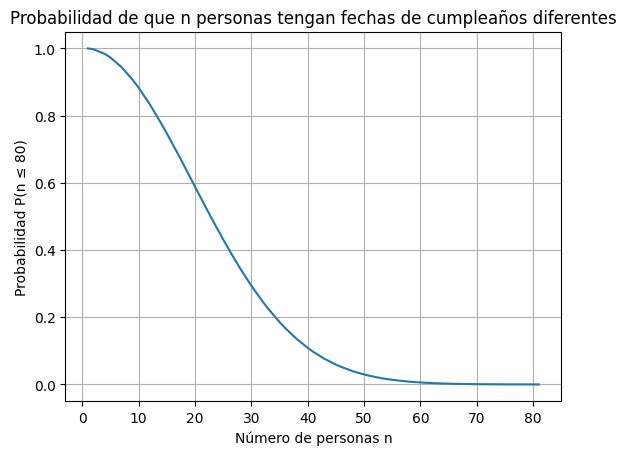

In [10]:
def prob_cumple(n):
    prob = 1
    for i in range(1, n+1):
        prob *= (365-i+1)/365
    return prob

x_ = np.linspace(1,81, dtype=int)
y_ = []

for i in x_:
    y_.append(prob_cumple(i))
    


plt.plot(x_, y_)
plt.xlabel('Número de personas n')
plt.ylabel('Probabilidad P(n ≤ 80)')
plt.title('Probabilidad de que n personas tengan fechas de cumpleaños diferentes')
plt.grid(True)
plt.show()


Distribuciones continuas de probabilidad

a)

In [11]:
fun = (2/3)*(x+2*y)

In [12]:
I1 = sp.integrate(fun, (y, 0, 1))
sp.simplify(sp.integrate(I1, (x, 0,1)))

1.00000000000000

b)

In [13]:
g = sp.integrate(fun, (y, 0,1))
g

0.666666666666667*x + 0.666666666666667

In [14]:
h = sp.integrate(fun, (x, 0, 1))
h

1.33333333333333*y + 0.333333333333333

c)

In [15]:
E_x = sp. integrate(fun*x, (x,0,1), (y,0,1))
E_x

0.555555555555556

d)

In [16]:
E_y = sp. integrate(fun*y, (x,0,1), (y,0,1))
E_y

0.611111111111111

e)

In [17]:
E_xy = c

In [18]:
E_xy - E_x * E_y

c - 0.339506172839506

f)

In [19]:
new = (x-E_x)*(y-E_y)
new

(x - 0.555555555555556)*(y - 0.611111111111111)

In [20]:
sp. integrate(fun*new, (x,0,1), (y,0,1))

-0.00617283950617284

g)

In [21]:
f

x**2 + y**2 + z**2 - 2*z + 1

In [22]:
sp.simplify(g*h)

0.666666666666667*(x + 1)*(1.33333333333333*y + 0.333333333333333)

$f(x,y)$ $\neq$ $g(x)h(y)$ por tanto no son independientes 

8)

In [23]:
def GetSample(N=int(1e5), ncoins=4):
    Sample = np.random.choice([-1, 1], size=(N, ncoins))
    return Sample

In [24]:
N = 100000
Sample = GetSample()

In [25]:
count = 0

for i in Sample:
    if np.count_nonzero(i == 1)==2 and np.count_nonzero(i == -1)==2:
        count+=1
        
count/N

0.37494

In [26]:
3/8

0.375

## Hidden Markov Models

In [27]:
#probabilidades
Pj = np.array([0.5,0.5])
Pb = np.array([0.9,0.1])

In [28]:
# Definimos estados y priors
States = np.array([0,1]) # Deben ser enteros 
Prior =  np.array([0.2,0.8])

In [29]:
# Definimos matrices de emisión y transmision
T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

In [30]:
DictH = {0:'Justa',1:'Sesgada'} 
DictH[0]

'Justa'

In [31]:
DictO = {0:'Sello',1:'Cara'}
DictO[0]

'Sello'

In [32]:
# Secuencia observada 120 -> VAR
Obs = np.array([0,1,1,1,0,1,0,1])

In [33]:
def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    print(CStates)
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)

In [34]:
HiddenStates = GetStates(States,8)
HiddenStates

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [35]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p

In [36]:
P = np.zeros(HiddenStates.shape[0], dtype=np.float64)

In [37]:
for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    
print(P)

[1.63840000e-04 8.19200000e-06 1.84320000e-05 2.04800000e-06
 1.84320000e-05 2.04800000e-06 2.04800000e-06 2.04800000e-06
 2.94912000e-04 1.47456000e-05 1.02400000e-07 3.68640000e-06
 9.21600000e-07 2.07360000e-06 3.68640000e-06 1.02400000e-07
 2.30400000e-07 2.56000000e-08 3.68640000e-06 1.02400000e-07
 2.30400000e-07 2.56000000e-08 2.30400000e-07 4.09600000e-07
 1.02400000e-07 2.30400000e-07 2.56000000e-08 2.30400000e-07
 2.56000000e-08 4.09600000e-07 1.47456000e-05 3.31776000e-05
 3.68640000e-06 3.31776000e-05 3.68640000e-06 3.68640000e-06
 5.89824000e-05 2.94912000e-06 1.65888000e-06 1.84320000e-07
 6.63552000e-06 1.84320000e-07 1.28000000e-09 4.60800000e-08
 1.84320000e-07 4.14720000e-07 7.37280000e-07 1.84320000e-07
 1.28000000e-09 4.60800000e-08 1.15200000e-08 2.59200000e-08
 4.60800000e-08 2.04800000e-08 4.60800000e-08 5.12000000e-09
 7.37280000e-07 1.84320000e-07 1.28000000e-09 4.60800000e-08
 1.15200000e-08 2.59200000e-08 4.60800000e-08 1.28000000e-09
 2.88000000e-09 3.200000

c)

In [38]:
np.sum(P)

0.0008814916088064008

d)

In [39]:
ii = np.where( P == np.amax(P))
print(HiddenStates[ii])

[[1 0 0 0 0 0 0 0]]


In [40]:
ObsStates = GetStates([0,1],8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [41]:
Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

In [42]:
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii])

[[0 0 0 0 0 0 0 0]]


In [43]:
np.sum(PObs)

1.0000000000000007

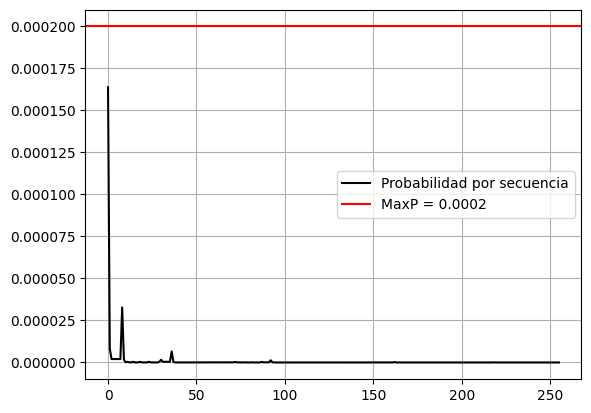

In [44]:
plt.plot(P, label='Probabilidad por secuencia', color='black')
plt.axhline(y=0.0002, linestyle='-', color='r', label='MaxP = 0.0002')
plt.grid()
plt.legend()
plt.show()

e) Depende el resultado de la probabilidad a-priori?

In [45]:
Prior2 =  np.array([0.9,0.1]) # Distribución de probabilidad a-priori
P2 = np.zeros(HiddenStates.shape[0], dtype=np.float64)
for i in range(P2.shape[0]):
    P2[i] = GetProb(T,E,Obs,HiddenStates[i],Prior2)

ii = np.where(P2 == np.amax(P2))
hsec2 = HiddenStates[ii[0][0]]
hsec_p2 = GetProb(T,E,Obs,HiddenStates[ii[0][0]],Prior)

In [46]:
hsec2

array([0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# Secuencia oculta más probable -> B,J,J,J,J,J,J,J
print("La secuencia oculta más probable es:",hsec2,", con una probabilidad de:",hsec_p2)

La secuencia oculta más probable es: [0 0 0 0 0 0 0 0] , con una probabilidad de: 0.00016384000000000008


In [48]:
Nobs = ObsStates.shape[0]
PObs = np.zeros(Nobs)

for j in range(Nobs):

    dim = HiddenStates.shape[0]
    P2 = np.zeros(dim)

    for i in range(dim):
        P2[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
    PObs[j] = np.sum(P2)

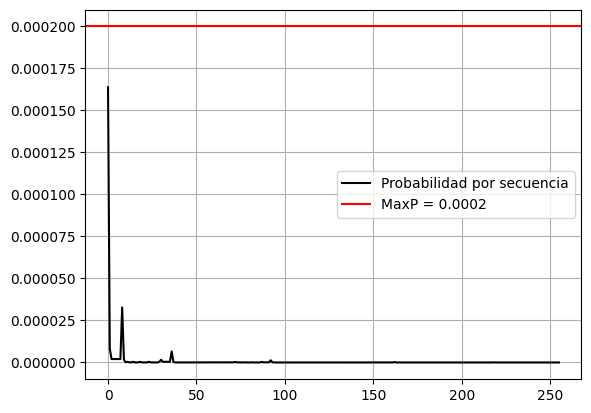

In [49]:
plt.plot(P2, label='Probabilidad por secuencia', color='black')
plt.axhline(y=0.0002, linestyle='-', color='r', label='MaxP = 0.0002')
plt.grid()
plt.legend()
plt.show()

Podemos ver que la variación en la distribución a-priori puede influir en la determinación de la secuencia oculta más probable, cambiando la secuencia así como su probabilidad. Al ajustar las probabilidades iniciales de elegir estados ocultos específicos, diferentes caminos ocultos pueden ganar prominencia, llevando a distintas secuencias ocultas más probables.

Sin embargo, también podemos notar que el cambio en la distribución a-priori no cambia la gráfica de las probabilidades de los estados observables. Las sumas de estas probabilidades, que representan las observaciones finales, pueden mantenerse relativamente constantes debido a la compensación entre las diferentes secuencias ocultas, lo que refleja el hecho de que múltiples rutas ocultas pueden contribuir de manera similar a las observaciones.

## Minimos cuadrados

1b)

In [51]:
A = np.array([[2,-1],[1,2],[1,1]])
b = np.array([2,1,4])


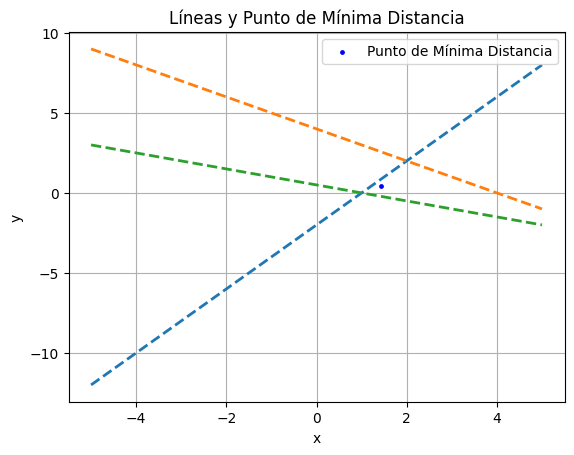


Punto de mínima distancia encontrado iterativamente: [1.429999999999863, 0.42999999999988425]
Mínima distancia encontrada: 2.5354683985409867
Si comparamos con los valores encontrados usando el método de minimos cuadrados tenemos:


Usando pasos itearivos para minimizar distancia: [1.429999999999863, 0.42999999999988425]


In [54]:
def min_distance(A):
# Búsqueda iterativa
  min_distance = float('inf')
  min_point = None

  for x in np.arange(-5, 5.01, 0.01):
      for y in np.arange(-5, 5.01, 0.01):
          distance = np.linalg.norm(A @ np.array([x, y]) - b)
          if distance < min_distance:
              min_distance = distance
              min_point = [x, y]
  return min_point, min_distance

min_point, min_distance = min_distance(A)
x = np.arange(-5, 5.01, 0.01)
y1 = 2*x -2
y2 = 4-x
y3 = -0.5*x + 0.5

plt.plot(x,y1,ls='--',lw=2)
plt.plot(x,y2,ls='--',lw=2)
plt.plot(x,y3,ls='--',lw=2)
#plt.scatter(xsol[0], xsol[1], color='red', marker='*', label='Punto con minimos cuadrados')
plt.scatter(min_point[0], min_point[1], color='blue', marker='o', label='Punto de Mínima Distancia', s = 6)
plt.title('Líneas y Punto de Mínima Distancia')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("\nPunto de mínima distancia encontrado iterativamente:", min_point)
print("Mínima distancia encontrada:", min_distance)
print("Si comparamos con los valores encontrados usando el método de minimos cuadrados tenemos:\n")
#print("Minimos cuadrados [x,y]", xsol)
print("\nUsando pasos itearivos para minimizar distancia:", min_point)

Ejercicio 7

a)

In [55]:
# Definiendo los vectores
b = np.array([-3, -3, 8, 9])
u1 = np.array([3, 1, 0, 1])
u2 = np.array([1, 2, 1, 1])
u3 = np.array([-1, 0, 2, -1])

# Calcular las proyecciones
proj_u1 = (np.dot(b, u1) / np.dot(u1, u1)) * u1
proj_u2 = (np.dot(b, u2) / np.dot(u2, u2)) * u2
proj_u3 = (np.dot(b, u3) / np.dot(u3, u3)) * u3

# Sumar las proyecciones
projection = proj_u1 + proj_u2 + proj_u3

print("Proyección ortogonal de b sobre el subespacio W:", projection)

Proyección ortogonal de b sobre el subespacio W: [-1.34199134  2.01298701  4.47619048 -0.7965368 ]


b)

In [58]:
def solver_min(A,b):
  At = A.T
  M = np.dot(At,A)
  bt = np.dot(At,b)
  xsol = np.linalg.solve(M,bt)
  return xsol


In [59]:
A = np.array([u1, u2, u3]).T

x = solver_min(A,b)

# Calcular la proyección ortogonal
projection_ls = np.dot(A, x)

print("Proyección ortogonal de b usando mínimos cuadrados:", projection_ls)

Proyección ortogonal de b usando mínimos cuadrados: [-2.0000000e+00  3.0000000e+00  4.0000000e+00 -4.4408921e-16]


In [60]:
v1 = u1 / np.linalg.norm(u1)
u2_orthogonal = u2 - np.dot(u2, v1) * v1
v2 = u2_orthogonal / np.linalg.norm(u2_orthogonal)
u3_orthogonal = u3 - np.dot(u3, v1) * v1 - np.dot(u3, v2) * v2
v3 = u3_orthogonal / np.linalg.norm(u3_orthogonal)

# Calcular los coeficientes c_i
c1 = np.dot(b, v1)
c2 = np.dot(b, v2)
c3 = np.dot(b, v3)

# Calcular la proyección sobre la base ortonormal
projection_gs = c1 * v1 + c2 * v2 + c3 * v3

print("Proyección ortogonal de b usando Gram-Schmidt:", projection_gs)

Proyección ortogonal de b usando Gram-Schmidt: [-2.00000000e+00  3.00000000e+00  4.00000000e+00  3.33066907e-16]


Lo que coincide con la respuesta dada: $p_W(b) = (−2, 3, 4, 0)$